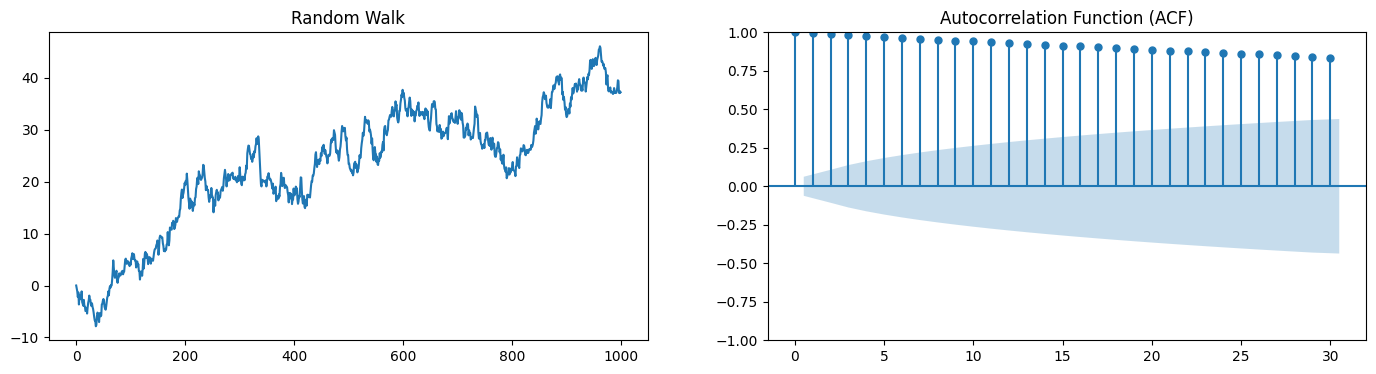

In [ ]:
import pandas as pd       # Importiamo alcune librerie
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf


np.random.seed(1)
steps = np.random.standard_normal(1000)
steps[0] = 0
random_walk = np.cumsum(steps)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 4))

axes[0].plot(random_walk)
axes[0].set_title("Random Walk")
plot_acf(random_walk, ax=axes[1], alpha=0.05, lags=30)
axes[1].set_title("Autocorrelation Function (ACF)")
plt.show()

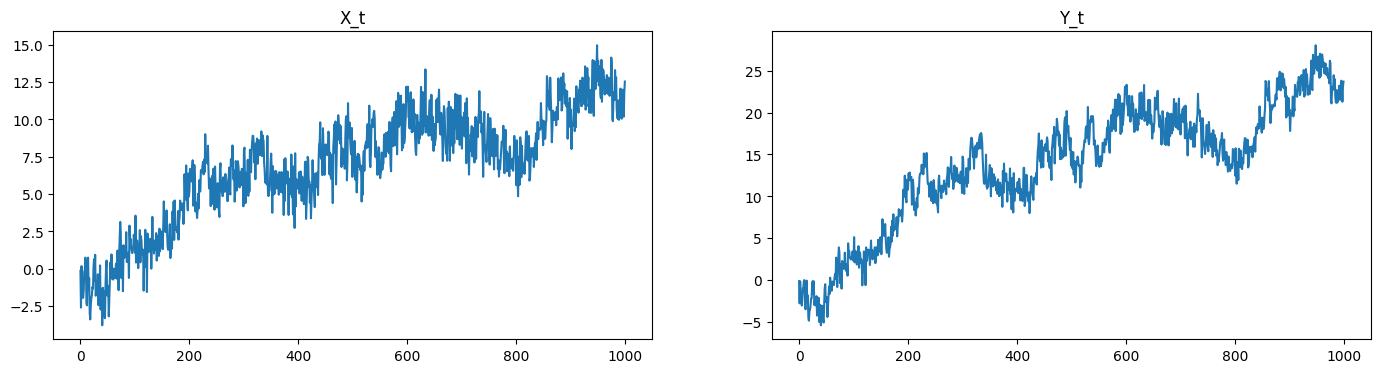

In [ ]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller

# creiamo la nostra random walk di partenza
np.random.seed(1)
steps = np.random.standard_normal(1000)
steps[0] = 0
random_walk = np.cumsum(steps)

# stabiliamo i parametri p e q
p=0.3
q=0.6

# creiamo due serie random walk con la stessa componente z = random walk e con errore WN
z = random_walk
eps = np.random.standard_normal(1000)

x_t = p*z + eps
y_t = q*z + eps


fig, axs = plt.subplots(1,2,figsize=[17,4]) # Definezione di due grafici

axs[0].plot(x_t)
axs[0].set_title('X_t')
axs[1].plot(y_t)
axs[1].set_title('Y_t')
plt.show()

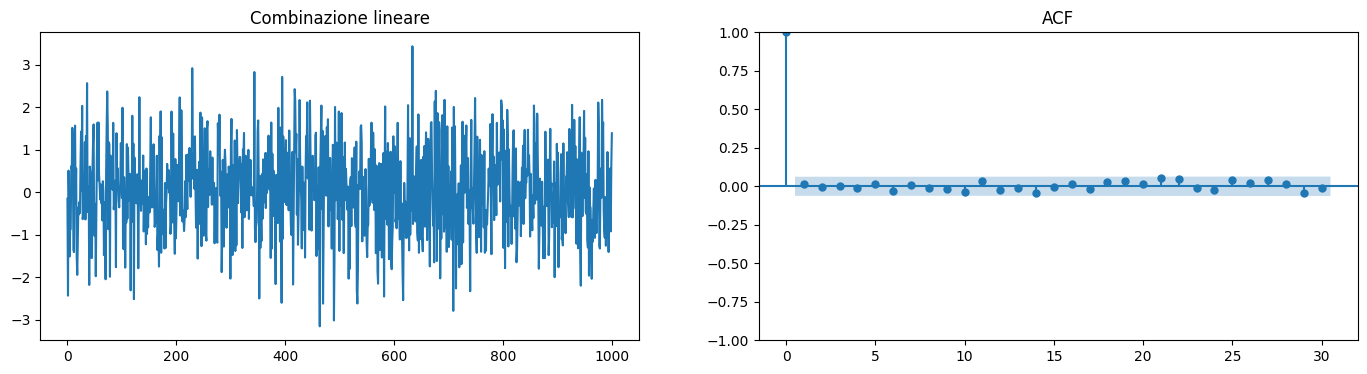

(-31.175881155618455,
 0.0,
 0,
 999,
 {'1%': -3.4369127451400474,
  '5%': -2.864437475834273,
  '10%': -2.568312754566378},
 2829.3263285951352)

In [ ]:
a = 2
b = 1

comb = a*x_t - b* y_t  # combinazione lineare

fig, axs = plt.subplots(1,2,figsize=[17,4]) # Definezione di due grafici
axs[0].plot(comb)
axs[0].set_title('Combinazione lineare')
plot_acf(comb, alpha=0.05, lags=30, ax=axs[1])
axs[1].set_title('ACF')

plt.show()

# Test di stazionarietà ADF
adfuller(comb)

In [ ]:

x_t= sm.add_constant(x_t)

comb = sm.OLS(y_t, x_t)

results = comb.fit()
print(results.summary())

resid = results.resid


adfuller(resid)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 5.215e+04
Date:                Sat, 15 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:14:32   Log-Likelihood:                -1416.3
No. Observations:                1000   AIC:                             2837.
Df Residuals:                     998   BIC:                             2846.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4478      0.066      6.756      0.0

(-3.4636807562707665,
 0.008970336600655824,
 21,
 978,
 {'1%': -3.437054035425408,
  '5%': -2.8644997864059363,
  '10%': -2.5683459429326576},
 2746.206472780167)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


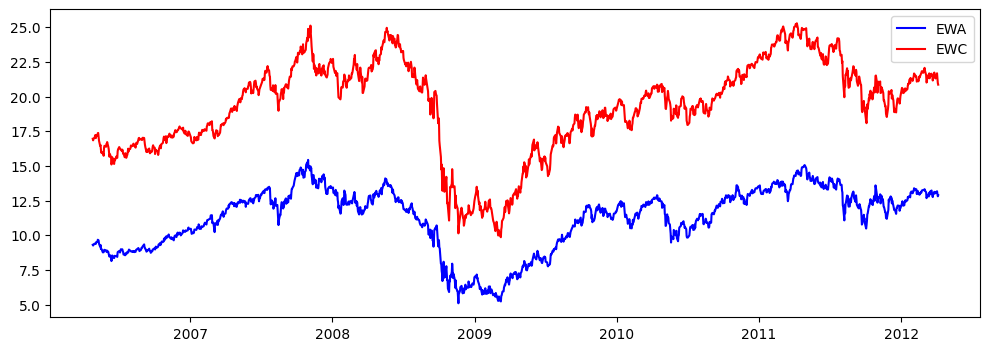

                            OLS Regression Results                            
Dep. Variable:                    EWC   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 1.742e+04
Date:                Sat, 15 Feb 2025   Prob (F-statistic):               0.00
Time:                        19:01:22   Log-Likelihood:                -2043.8
No. Observations:                1499   AIC:                             4092.
Df Residuals:                    1497   BIC:                             4102.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1346      0.125     25.146      0.0

In [ ]:
EWA = yf.download('EWA', start="2006-04-26", end="2012-04-09")
EWC = yf.download('EWC', start="2006-04-26", end="2012-04-09")

EWA_cls = EWA['Close']
EWC_cls = EWC['Close']

plt.figure(figsize=(12, 4))
plt.plot(EWA_cls, 'b')
plt.plot(EWC_cls, 'r')
plt.legend(['EWA', 'EWC'])
plt.show()

reg1 = sm.OLS(EWC_cls, sm.add_constant(EWA_cls)).fit()
reg2 = sm.OLS(EWA_cls, sm.add_constant(EWC_cls)).fit()

print(reg1.summary())
print(reg2.summary())

print('ADFULLER TEST')
print(adfuller(reg1.resid))
print(adfuller(reg2.resid))
